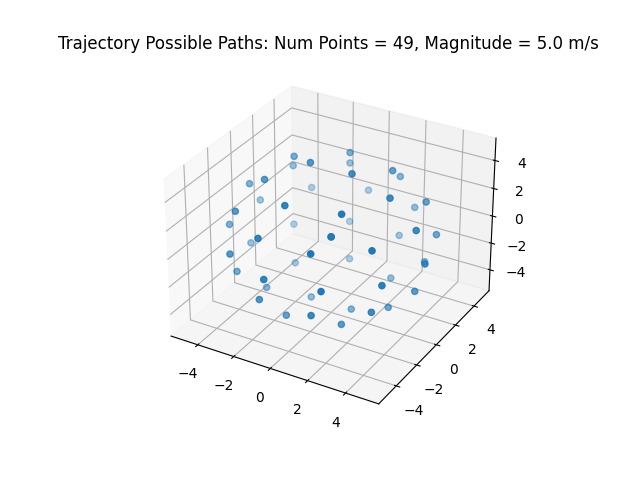

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import math as math
%matplotlib widget
N_count = 0


def create_possible_paths(magnitude, n_points):
    s_r = magnitude # Magnitude of thrust
    N_count = 0
    
    sphere_points = np.zeros((int(np.ceil(n_points)) + 2,3))
    
    sphere_area = (4 * np.pi) / n_points
    d = np.sqrt(sphere_area)    

    M_theta = int(np.ceil(np.pi/d))
    d_theta = np.pi/M_theta
    d_phi = sphere_area / d_theta
    for m in range(0, M_theta):
        theta = (np.pi * (m + 0.5)) / M_theta
        M_phi = round((2 * np.pi * np.sin(theta)) / d_phi)
        for n in range (0, M_phi):
            phi = (2 * np.pi * n) / M_phi
            sphere_points[N_count] = spherical_points_to_cartesian(s_r, theta, phi)
            N_count += 1
    plot_point_num(sphere_points, N_count)
    return(sphere_points)


def spherical_points_to_cartesian(r, theta, phi):
    """Converts spherical coordinates into cartesian ones"""
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    returned_vector = r * np.array([x,y,z])
    
    return returned_vector

def plot_point_num(points, N_count):
    fig = plt.figure()
    ax_p = fig.add_subplot(projection='3d')
    ax_p.scatter(points[:,0], points[:,1], points[:,2])
    ax_p.set_title(f"Trajectory Possible Paths: Num Points = {N_count}, Magnitude = {np.linalg.norm(points[0])} m/s")



path_starts = create_possible_paths(5, 50)

6.67e-11


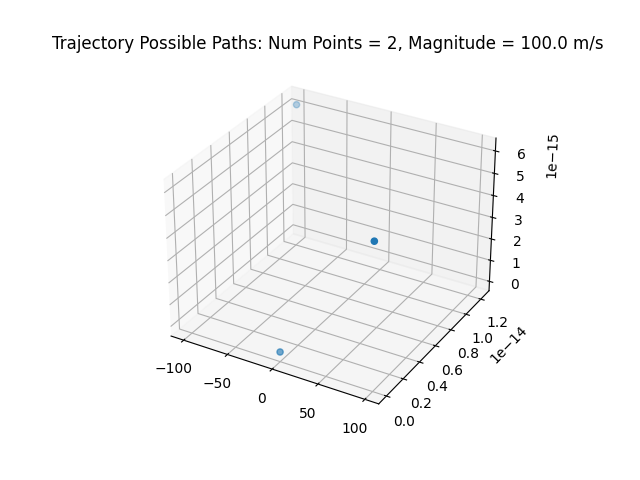

In [8]:
import numpy as np

grav_const = 6.67e-11
print(grav_const)

class Body():
    def __init__(self, name, y, mass):
        self.name = name
        self.y = y
        self.mass = mass
        
class Simulation(Body):
    def __init__(self, max_steps, dt, max_sims, bodies):
        self.bodies = bodies
        self.max_steps = max_steps
        self.dt = dt
        self.max_sims = max_sims

    def run_sim(self, satellite):
        
        paths = np.zeros((self.max_sims, 3, int(self.max_steps / self.dt)))
        #print(len(paths[0][0]))
        path_alterations = create_possible_paths(100, self.max_sims)
        for p in range(len(paths)):
            altered_y_i = satellite.y
            altered_y_i[3:] += path_alterations[p]
            t_list, y = RK4(self, altered_y_i, grav_function, self.max_steps, self.dt)
            paths[p] = y[:3]
            
        return paths

def grav_function(sim, y):
    """Calculates the acceleration experienced by the object"""
    
    y_new = np.zeros(6)
    for body in sim.bodies:
        
        sep = body.y[:3] - y[:3]
        sep_mag = np.linalg.norm(sep)

        #print(sep_mag)
        accel = ((grav_const * body.mass) / (sep_mag ** 3)) * sep
        
        #print(np.linalg.norm(accel))
        #if np.linalg.norm(accel) > 100000:
        #    print(accel, sep, body.mass)
        #print(y)
        y_new[3:] += accel * sim.dt
        #print(y_new)
        y_new[:3] += (y[3:] + y_new[3:]) * sim.dt
        #print(y_new)
    return y_new
        
        
                    
def RK4(sim, y_initial, f, t, dt):
    """Implementation of a 4th-order Runge Kutta method."""  
    m = y_initial.shape[0]
    max_steps = int(t/dt)
    tlist = np.linspace(0, t, max_steps)
    y = np.zeros((m, max_steps), float)
    y[:, 0] = y_initial
    #y[:, 0] = Sim1.sat_y
    for i in range(0,max_steps-1):
        k1 = f(sim, y[:, i])
        #print(k1)
        k2 = f(sim, y[:, i] + (0.5 * dt * k1))
        #print(k2)
        k3 = f(sim, y[:, i] + 0.5 * dt * k2)
        k4 = f(sim, y[:, i] + dt * k3)
        y[:, i + 1] = y[:, i] + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return(tlist, y)

#Sat = Body("Satellite", np.array([22314050.238, -6.50E+04, -1.70E+04, -933.974765, -5000.940683, 498.5964516]), 2)
Sat = Body("Satellite", np.array([-2635196.87770904, 2995485.36951415, 5492407.21825102, 4616.81444927, 6110.51633369, -243.59605556]), 2)
# 5.97e24

#Sat = Body("Satellite", np.array([-1.43e11, 1678245, 4.84E+10, -9083, -2.34, -28122]), 2)
Planet = Body("Planet", np.array([1,1,1,1,1,1]), 5.97e24)
#print(Sat.y)

Sim1 = Simulation(100000, 0.5, 1, [Planet])

#grav_function(Sim1, Sat.y)
#Simulation.run_sim(Sim1)

#print(Sim1.sat_y)
#t_list, y = RK4(Sim1, Sat.y, grav_function, 120000, 2000)


paths = Simulation.run_sim(Sim1, Sat)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


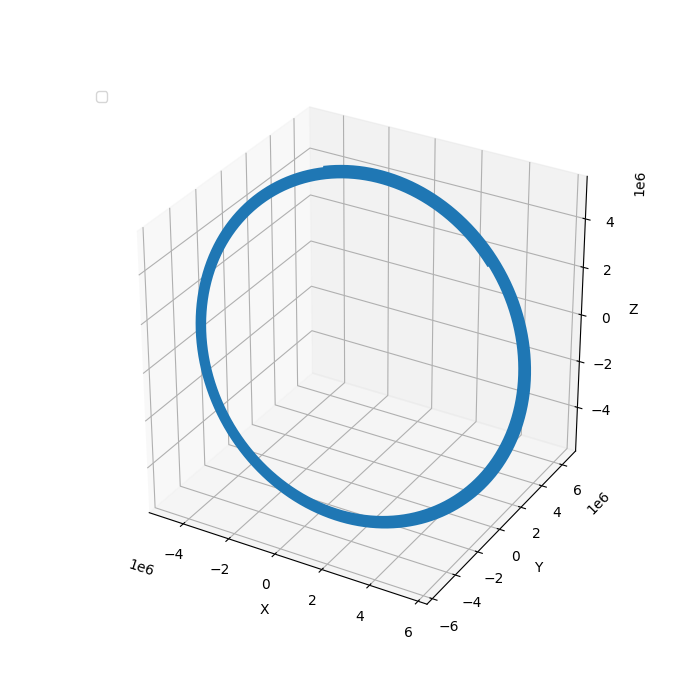

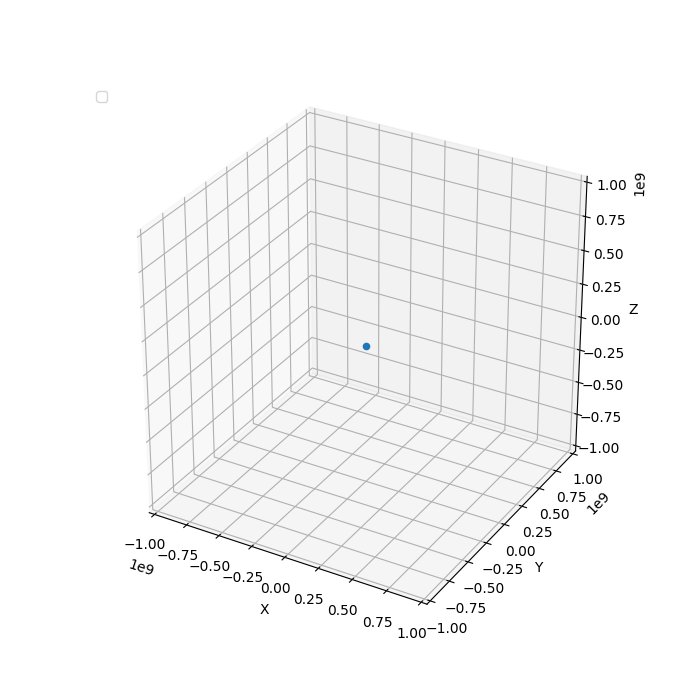

In [9]:
import matplotlib.pyplot as plt
%matplotlib widget
# Graphing section
fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])

graphcounter = 0

# This just names the orbital paths from the CSV
for path in paths:
    ax.plot3D(path[0], path[1], path[2])

leg = plt.legend(loc='upper left')

    
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

ax.set_xlabel('X')

ax.set_ylabel('Y')

ax.set_zlabel('Z')


plt.show()
x = 6371000 * np.outer(np.cos(u), np.sin(v))
y = 6371000 * np.outer(np.sin(u), np.sin(v))
z = 6371000 * np.outer(np.ones(np.size(u)), np.cos(v))

#ax.plot_surface(x, y, z, rstride=2, cstride=2, color='b')
ax.scatter(0,0,0)
# The area that the graph will show upon start
GraphAreaStart = 1000000000

ax.set_xlim3d(-1 * GraphAreaStart, GraphAreaStart)
ax.set_ylim3d(-1 * GraphAreaStart, GraphAreaStart)
ax.set_zlim3d(-1 * GraphAreaStart, GraphAreaStart)

plt.show()